# Credit Card Fraud Detection

Il dataset contiene transazioni fatte tramite carta di credito nel settembre 2013 in Europa.
Questo dataset presenta transazioni avvenute in due giorni. Delle 284807 transazioni, 492 sono etichettate come frodi, le altre sono da ritenersi legittime. Il dataset è estremamente sbilanciato, con i casi positivi che rappresentano soltanto lo 0.172% di tutte le transazioni.

Nel dataset sono presenti soltanto variabili di input di tipo numerico, risultanti da una trasformazione Principal Component Analysis (PCA). Per ragioni di confidenzialità non sono disponibili né le features originali né informazioni sull'origine dei dati più dettagliate. Le uniche features non trasformate tramite PCA sono 'Tempo' e 'Ammontare'.
Il tempo misura i sencondi trascorsi tra ogni transazione e la prima transazione del dataset. La feature 'Ammontare' è l'ammontare della transazione.
Le transazioni etichettate con 1 sono frodi, quelle etichettate con 0 sono legittime.

Essendo il dataset già curato non sono necessarie operazioni di pulizia ed imputazione dei dati.



## Setup dell'ambiente

Le operazioni di setup sono differenti a seconda della piattaforma utilizzata, ne va utilizzato solo uno, o del codice personalizzato in caso di ambienti diversi.

In [2]:
# Kaggle token
token = {"username":"andreaaugello","key":"636f00800308e8447dea0ee8f2decb98"}

### Google Colaboratory

In [4]:
filepath = "/content/creditfraud/creditcard.csv"

! rm -Rf /content/creditfraud/
! which kaggle || pip install kaggle
! if ! [ -d ~/.kaggle ] ; then  mkdir ~/.kaggle  && touch ~/.kaggle/kaggle.json; echo "Creating kaggle directory"; fi

import json

import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

! if ! [ -f /content/creditfraud/creditcard.csv ] ; then chmod 600 /root/.kaggle/kaggle.json && kaggle datasets download -p /content/creditfraud/ -d mlg-ulb/creditcardfraud ; fi

os.chdir('/content/creditfraud')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

/usr/local/bin/kaggle
 74% 49.0M/66.0M [00:00<00:00, 51.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 90.4MB/s]


In [5]:
!head -n 2 /content/creditfraud/creditcard.csv
!tail -n 2 /content/creditfraud/creditcard.csv

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"
172788,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,-0.399125651432835,-1.93384881505713,-0.962886142890271,-1.04208165591191,0.449624443166001,1.96256312066577,-0.60857

In [6]:
%%shell

apt-get install openjdk-8-jdk-headless -qq  &>/dev/null
if ! [ -f spark-3.1.1-bin-hadoop2.7.tgz ] ; then 
  wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz && 
  tar xf spark-3.1.1-bin-hadoop2.7.tgz ; 
fi
pip show findspark &>/dev/null || pip install -q findspark
pip show pyspark &>/dev/null || pip install pyspark

     |████████████████████████████████| 212.3MB 67kB/s 
     |████████████████████████████████| 204kB 47.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=26a0734820b4032077ad57267b50fbdd95b32bb1ab758dd6cd0143214b1b9f75
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [7]:
# Set up required environment variables

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/creditfraud/spark-3.1.1-bin-hadoop2.7"

! mkdir -p $SPARK_HOME/conf/
! echo "spark.driver.memory              8g" >> $SPARK_HOME/conf/spark-defaults.conf

import findspark
location = findspark.find()
findspark.init(location)

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CardFraud').getOrCreate()

### Kaggle notebook

È necessario abilitare internet per il notebook, è quindi richiesta la verifica tramite numero di telefono.

In [ ]:
filepath = "../input/creditcardfraud/creditcard.csv"

!head -n 2 ../input/creditcardfraud/creditcard.csv
!tail -n 2 ../input/creditcardfraud/creditcard.csv

In [ ]:
! apt-get install openjdk-8-jdk-headless -qq &>/dev/null
! if ! [ -f spark-3.1.1-bin-hadoop2.7.tgz ] ; then \
  wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz && \
  tar xf spark-3.1.1-bin-hadoop2.7.tgz ; \
fi
! pip show findspark &>/dev/null || pip install -q findspark
! pip show pyspark &>/dev/null || pip install pyspark

In [ ]:
# Set up required environment variables

# Set up required environment variables

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "./spark-3.1.1-bin-hadoop2.7"


! mkdir -p $SPARK_HOME/conf/
! echo "spark.driver.memory              8g" >> $SPARK_HOME/conf/spark-defaults.conf

import findspark
location = findspark.find()
findspark.init(location)

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CardFraud').getOrCreate()

### Databricks Community Edition

Con la versione community è necessario caricare manualmente il file .csv nel filesystem distribuito.

In [ ]:
filepath = "dbfs:/FileStore/creditcard.csv"
import mlflow

! rm -Rf /content/creditfraud/
! which kaggle || pip install kaggle
! if ! [ -d ~/.kaggle ] ; then  mkdir ~/.kaggle  && touch ~/.kaggle/kaggle.json; echo "Creating kaggle directory"; fi

import json

import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

! if ! [ -f /content/creditfraud/creditcard.csv ] ; then chmod 600 /root/.kaggle/kaggle.json && kaggle datasets download -p /content/creditfraud/ -d mlg-ulb/creditcardfraud ; fi

os.chdir('/content/creditfraud')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

In [ ]:
!head -n 2 /content/creditfraud/creditcard.csv
!tail -n 2 /content/creditfraud/creditcard.csv

In [ ]:
# Set up required environment variables

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CardFraud').getOrCreate()

## Analisi dei dati

In [8]:
# Importazione dei dati dal data set 
from pyspark.sql.types import *
from pyspark.sql.functions import *


# costruzione dello schema del DataFrame

creditcard_schema = StructType([
    StructField('Time',IntegerType(),False),
    StructField('V1',FloatType(),False),
    StructField('V2',FloatType(),False),
    StructField('V3',FloatType(),False),
    StructField('V4',FloatType(),False),
    StructField('V5',FloatType(),False),
    StructField('V6',FloatType(),False),
    StructField('V7',FloatType(),False),
    StructField('V8',FloatType(),False),
    StructField('V9',FloatType(),False),
    StructField('V10',FloatType(),False),
    StructField('V11',FloatType(),False),
    StructField('V12',FloatType(),False),
    StructField('V13',FloatType(),False),
    StructField('V14',FloatType(),False),
    StructField('V15',FloatType(),False),
    StructField('V16',FloatType(),False),
    StructField('V17',FloatType(),False),
    StructField('V18',FloatType(),False),
    StructField('V19',FloatType(),False),
    StructField('V20',FloatType(),False),
    StructField('V21',FloatType(),False),
    StructField('V22',FloatType(),False),
    StructField('V23',FloatType(),False),
    StructField('V24',FloatType(),False),
    StructField('V25',FloatType(),False),
    StructField('V26',FloatType(),False),
    StructField('V27',FloatType(),False),
    StructField('V28',FloatType(),False),
    StructField('Amount',FloatType(),False),
    StructField('Class',ShortType(),False),
])

records = spark.read.format('csv')\
    .option('header','true')\
    .option('mode','DROPMALFORMED')\
    .option('mode','PERMISSIVE')\
    .schema(creditcard_schema)\
    .load(filepath).dropDuplicates()

#records.printSchema()
#records.show()

display(records)
display(records.describe().toPandas())

DataFrame[Time: int, V1: float, V2: float, V3: float, V4: float, V5: float, V6: float, V7: float, V8: float, V9: float, V10: float, V11: float, V12: float, V13: float, V14: float, V15: float, V16: float, V17: float, V18: float, V19: float, V20: float, V21: float, V22: float, V23: float, V24: float, V25: float, V26: float, V27: float, V28: float, Amount: float, Class: smallint]

,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,283725,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726
1,mean,94811.0593109525,0.0059171496151878295,-0.004134755596655358,0.0016131194013566076,-0.0029663077763300767,0.0018275601352146962,-0.0011394883794042796,0.0018006916556496844,-8.544525275343677E-4,-0.0015961996029800678,-0.0014407104420079613,2.0175758274159E-4,-7.147876010724789E-4,6.033758161790353E-4,2.523172098282817E-4,0.0010428379946567953,0.0011620127510330307,1.7016099417563552E-4,0.0015151660271279712,-2.6426355734881E-4,1.8717529004213355E-4,-3.705931333337562E-4,-1.5027521572740273E-5,1.9817071581241128E-4,2.1420687436297502E-4,-2.3238699909439164E-4,1.4944104385428625E-4,0.001763031635814916,5.473120965431608E-4,88.47268730080253,0.001667101358352777
2,stddev,47481.13056592805,1.948026141905308,1.6467029644100455,1.508681915996848,1.4141840143251605,1.3770082799610668,1.331930591492362,1.227663895509697,1.1790544275868806,1.0954924812185733,1.076407350284195,1.0187201524646452,0.9946744452641615,0.995429636753189,0.9522150895082739,0.9148936334358042,0.8736963276905809,0.8425073208639574,0.8373775296067039,0.8133785530591242,0.769984241276464,0.723909366672215,0.7245504655227915,0.6237023784485339,0.6056266981900321,0.5212203166769496,0.4820529407603699,0.3957438805701256,0.32802660442911424,250.3994368876579,0.04079617625933864
3,min,0,-56.40751,-72.71573,-48.32559,-5.6831713,-113.74331,-26.160505,-43.557243,-73.21672,-13.434067,-24.588263,-4.7974734,-18.683714,-5.791881,-19.214325,-4.4989448,-14.129854,-25.1628,-9.498746,-7.213527,-54.49772,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.6045506,-22.56568,-15.430084,0.0,0
4,max,172792,2.45493,22.05773,9.382559,16.875343,34.801666,73.30163,120.58949,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315111,9.253527,5.041069,5.5919714,39.420906,27.202839,10.50309,22.528412,4.584549,7.5195885,3.5173457,31.612198,33.84781,25691.16,1


Possiamo vedere che in uno dei record manca il campo del tempo, cerchiamo quindi di individuarlo ed, eventualmente, correggere l'errore.

Cerchiamo nel file CSV il record che non inizia con un numero intero.

In [10]:
! grep -v "^[0-9]*," creditcard.csv 

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
1e+05,-1.40863322829137,-1.624697936324,2.54774230369692,0.385671523516146,0.502790072699087,0.507194721385658,-1.74443114473473,0.760594225747498,3.00170400322912,-1.16309493493591,0.393516209370638,-1.9761080196344,0.231283936059375,0.526783847087809,-3.23246747614055,0.021830807795285,0.519902436567202,1.12642627868296,0.0800098779433671,0.209032736561698,0.21764082393781,0.758246770655715,0.281254134069628,0.736607975853892,-0.741402076374565,0.255349902866452,0.141944167181525,0.228167205092217,49.5,"0"


Risulta essere un record in cui il tempo è scritto in notazione scientifica come $1\cdot 10^{5}$.
Appartiene alla classe delle transazioni legittime già sovrarappresentata, quindi non è molto importante mantenerlo, ma lo correggiamo ugualmente sostituendo il valore `null` con $100000$. 

Essendoci soltanto una riga con tempo nullo possiamo utilizzare la trasformazione `withColumn` senza problemi. 

In [9]:
records = records.withColumn("Time",
                             when(records["Time"].isNull(),
                                  100000) \
                             .otherwise(records["Time"]))

display(records.describe().toPandas())

,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726
1,mean,94811.07759951502,0.0059171496151878295,-0.004134755596655358,0.0016131194013566076,-0.0029663077763300767,0.0018275601352146962,-0.0011394883794042796,0.0018006916556496844,-8.544525275343677E-4,-0.0015961996029800678,-0.0014407104420079613,2.0175758274159E-4,-7.147876010724789E-4,6.033758161790353E-4,2.523172098282817E-4,0.0010428379946567953,0.0011620127510330307,1.7016099417563552E-4,0.0015151660271279712,-2.6426355734881E-4,1.8717529004213355E-4,-3.705931333337562E-4,-1.5027521572740273E-5,1.9817071581241128E-4,2.1420687436297502E-4,-2.3238699909439164E-4,1.4944104385428625E-4,0.001763031635814916,5.473120965431608E-4,88.47268730080253,0.001667101358352777
2,stddev,47481.047890619506,1.948026141905308,1.6467029644100455,1.508681915996848,1.4141840143251605,1.3770082799610668,1.331930591492362,1.227663895509697,1.1790544275868806,1.0954924812185733,1.076407350284195,1.0187201524646452,0.9946744452641615,0.995429636753189,0.9522150895082739,0.9148936334358042,0.8736963276905809,0.8425073208639574,0.8373775296067039,0.8133785530591242,0.769984241276464,0.723909366672215,0.7245504655227915,0.6237023784485339,0.6056266981900321,0.5212203166769496,0.4820529407603699,0.3957438805701256,0.32802660442911424,250.3994368876579,0.04079617625933864
3,min,0,-56.40751,-72.71573,-48.32559,-5.6831713,-113.74331,-26.160505,-43.557243,-73.21672,-13.434067,-24.588263,-4.7974734,-18.683714,-5.791881,-19.214325,-4.4989448,-14.129854,-25.1628,-9.498746,-7.213527,-54.49772,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.6045506,-22.56568,-15.430084,0.0,0
4,max,172792,2.45493,22.05773,9.382559,16.875343,34.801666,73.30163,120.58949,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315111,9.253527,5.041069,5.5919714,39.420906,27.202839,10.50309,22.528412,4.584549,7.5195885,3.5173457,31.612198,33.84781,25691.16,1


Il dataset è estremamente sbilanciato, è importante garantire la presenza di campioni di ogni classe in fase di addestramento e test, servirà quindi un campionamento stratificato.
Creiamo una funzione per separare il dataset in base alla classe.

In [10]:
def split_categories(dataset, describe=False):
  fraud = dataset.filter(dataset.Class.contains(1))
  legit = dataset.filter(dataset.Class.contains(0))
  
  if describe :
    print("Fraudolent transactions: ",fraud.count())
    print("Legit transactions:      ",legit.count())
    print("-"*40)
    print("Total transactions:      ",dataset.count())
  
    print("Fraudolent transactions summary:")
    display(fraud.describe().toPandas())
    print("Legit transactions summary:")
    display(legit.describe().toPandas())
    
  return (fraud, legit)


fraud, legit = split_categories(records, describe=True)

Fraudolent transactions:  473
Legit transactions:       283253
----------------------------------------
Total transactions:       283726


,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473
1,mean,80450.51374207188,-4.498280127541641,3.4059646808658974,-6.729598957119829,4.472591017542237,-2.9571967552481,-1.4325178676042667,-5.175912117902298,0.9532545857002668,-2.5221241465297157,-5.453274097600775,3.7163466153930402,-6.103254030578737,-0.09432409086656494,-6.835946011445613,-0.07282957323235174,-4.000956273911399,-6.463285283364717,-2.1570708822325093,0.6691429929639927,0.405042828762132,0.4665503255219591,0.08663875736437943,-0.09646415969787114,-0.1066429800007898,0.04061511687675325,0.05045623097899291,0.2137737536100858,0.07827024681672816,123.8718610007757,1.0
2,stddev,48636.179973291546,6.593145389253788,4.122500167707574,6.909647332730045,2.871522665845248,5.27883114221415,1.7153474007643992,6.85802392082861,5.585949608500923,2.4650465864475235,4.706451133302745,2.672817434766687,4.582330528846759,1.108000621030718,4.253209563446225,1.0456310212079307,3.8317244760769102,6.965743558693856,2.9018146192872254,1.5342461928383615,1.289414485161323,2.731190803772146,1.18129490098165,1.5085698187859555,0.5178998978573122,0.8067851930499493,0.4630160321386652,1.2457786167172924,0.5330995761736647,260.21104496665583,0.0
3,min,406,-30.55238,-8.402154,-31.103685,-1.3132749,-22.105532,-6.4062667,-43.557243,-41.044262,-13.434067,-24.588263,-1.7022284,-18.683714,-3.127795,-19.214325,-4.4989448,-14.129854,-25.1628,-9.498746,-3.6819036,-4.1281857,-22.797604,-8.887017,-19.254328,-2.0280242,-4.7816057,-1.1526711,-7.263482,-1.8692905,0.0,1
4,max,170348,2.132386,22.05773,2.2502096,12.114672,11.095089,6.4741144,5.8025374,20.007208,3.353525,4.031435,12.018913,1.3759414,2.8154397,3.442422,2.4713578,3.1396556,6.739384,3.790316,5.2283416,11.059004,27.202839,8.361985,5.46623,1.0914347,2.2082093,2.7452607,3.0523577,1.7793639,2125.87,1


,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253
1,mean,94835.05809294165,0.013438642104570749,-0.009829230265756083,0.012853471002909001,-0.01043997483325686,0.006768791123681925,0.0012507492292825125,0.010446877782260555,-0.0024477051147329142,0.0026127927780232965,0.007663225587358353,-0.006003777814038926,0.00947575252358087,7.618937903609077E-4,0.011667983802782368,0.001166196442794591,0.007845090951762874,0.010963389751441248,0.005119756978774761,-0.0013820968453796324,-4.88887184467575E-4,-0.0011502974772381578,-1.5972939675519332E-4,3.595857133081918E-4,3.926461120478266E-4,-3.0059764234715837E-4,6.543447855993607E-5,0.001408998063376742,4.1752371611065883E-4,88.41357474361834,0.0
2,stddev,47475.55060678742,1.9221789216971121,1.6335200481234662,1.4575927959597288,1.3985746513082402,1.3558162028216862,1.3299140443567343,1.1774803401210014,1.1571399740545782,1.0869018436584412,1.03632059799942,1.0022574945385545,0.9453821110365817,0.9952256113510618,0.8943786768612839,0.914656807866549,0.8446082250202864,0.748512626760154,0.824952470905795,0.8111827424354725,0.768648898936912,0.7156291938210353,0.7235413808156624,0.6211653147674734,0.6057475837383258,0.5206119955246402,0.4820804961004177,0.39270017710615235,0.32756290978766794,250.37902267664762,0.0
3,min,0,-56.40751,-72.71573,-48.32559,-5.6831713,-113.74331,-26.160505,-31.764946,-73.21672,-6.2907305,-14.7410965,-4.7974734,-15.144988,-5.791881,-18.392092,-4.391307,-10.11556,-17.098444,-5.36666,-7.213527,-54.49772,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.6045506,-22.56568,-15.430084,0.0,0
4,max,172792,2.45493,18.902452,9.382559,16.875343,34.801666,73.30163,120.58949,18.709255,15.594995,23.745136,10.002191,7.848392,7.126883,10.526766,8.877742,17.315111,9.253527,5.041069,5.5919714,39.420906,22.61489,10.50309,22.528412,4.584549,7.5195885,3.5173457,31.612198,33.84781,25691.16,0


In [12]:
import numpy as np
from scipy.stats import entropy
from math import log
import pandas as pd   



I descrittori statistici ottenuti precedentemente sono abbastanza differenti per le due classi, osserviamo adesso la forma delle distribuzioni delle varie feature.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn


%matplotlib inline


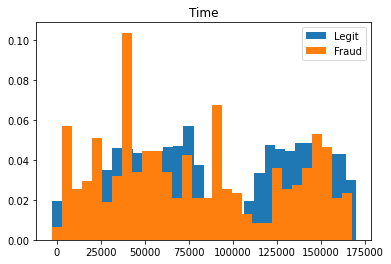

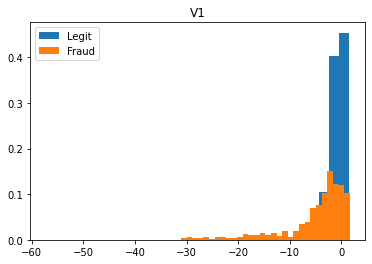

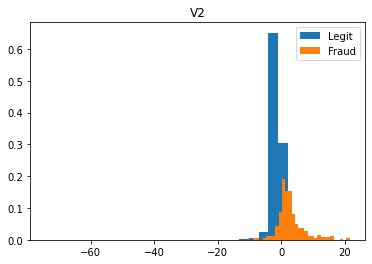

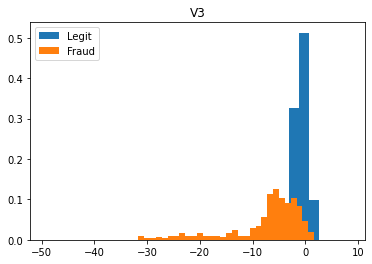

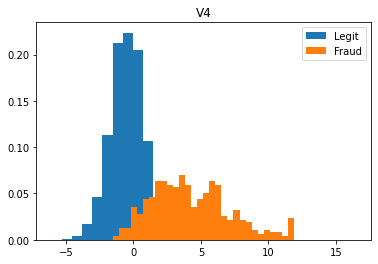

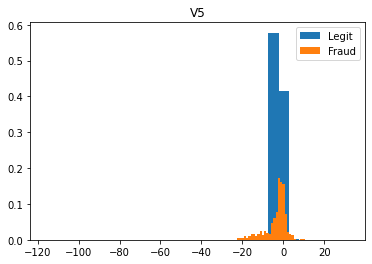

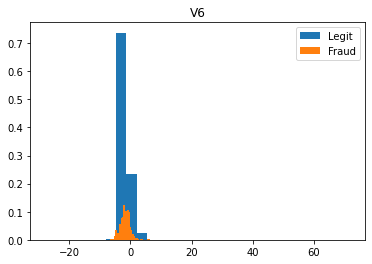

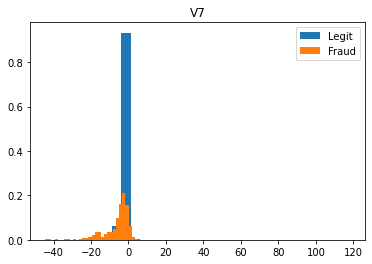

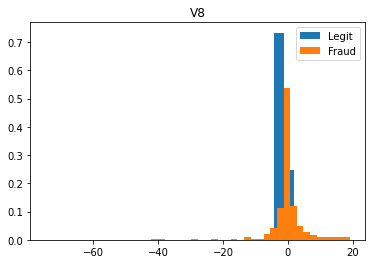

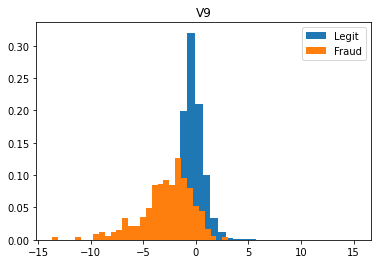

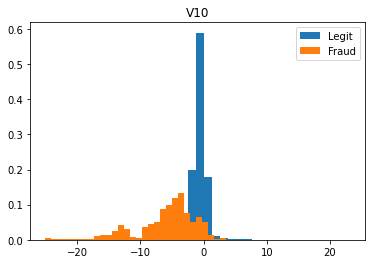

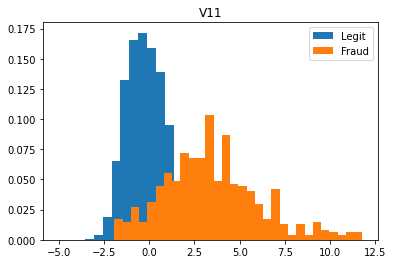

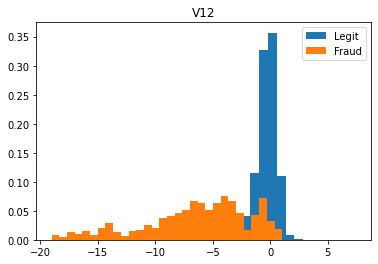

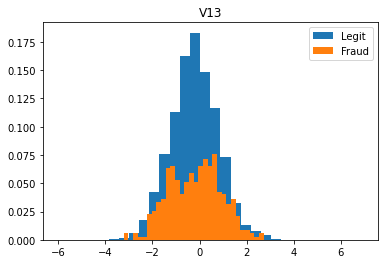

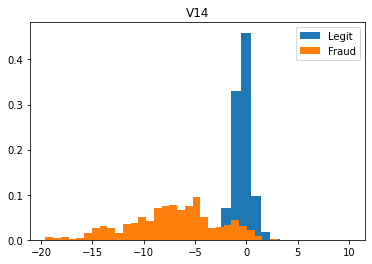

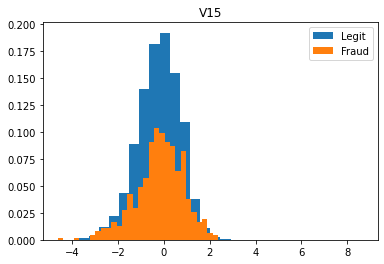

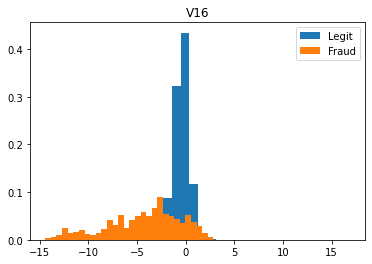

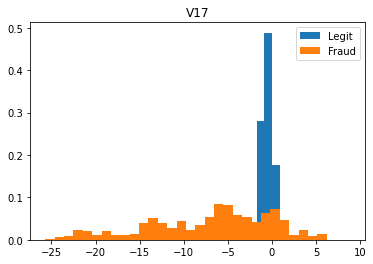

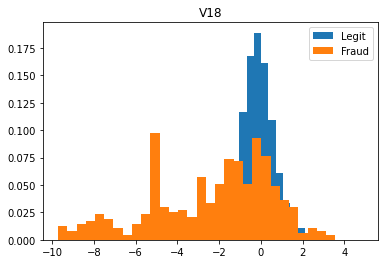

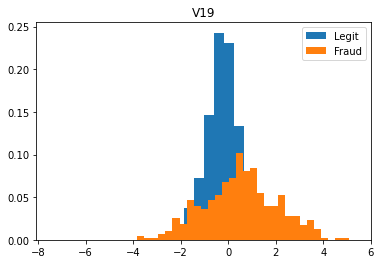

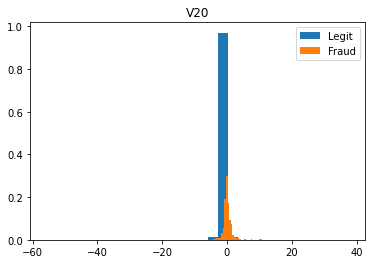

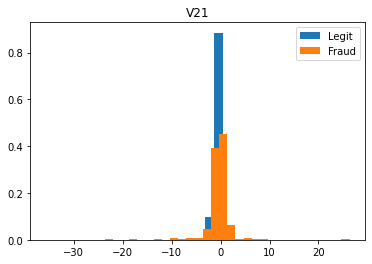

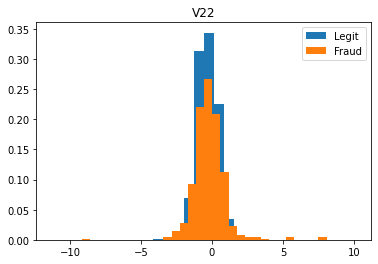

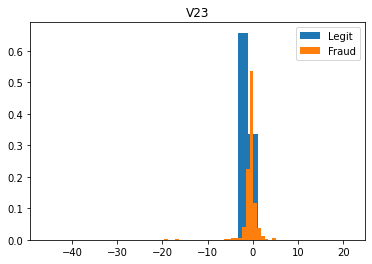

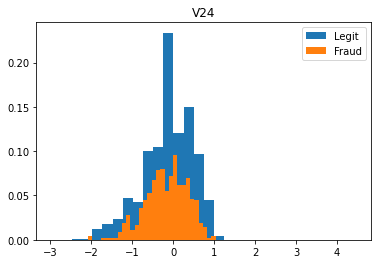

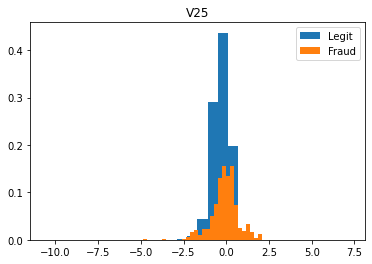

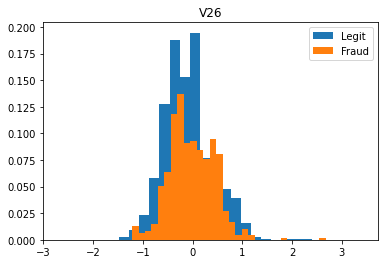

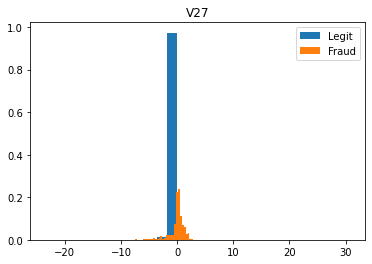

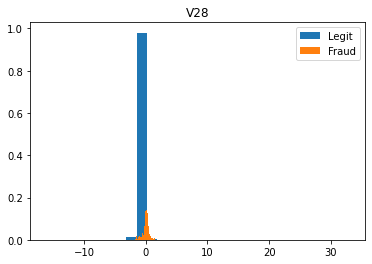

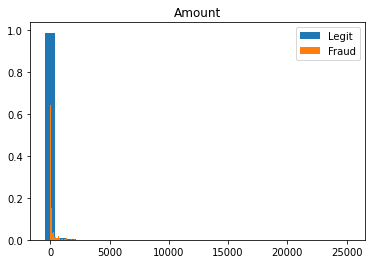

In [66]:
for col in fraud.columns[0:-1]:
  hist_f = fraud.select(col).rdd.flatMap(lambda x: x).histogram(30)
  hist_l = legit.select(col).rdd.flatMap(lambda x: x).histogram(30)
  # Loading the Computed Histogram into a Pandas Dataframe for plotting
  fig = plt.figure()
  plt.title(col)
  plt.axis(True)
  plt.bar(hist_l[0][0:-1],hist_l[1]/np.sum(hist_l[1]), width=np.diff(hist_l[0]))
  plt.bar(hist_f[0][0:-1],hist_f[1]/np.sum(hist_f[1]), width=np.diff(hist_f[0]))
  plt.legend(["Legit","Fraud"])

  plt.show()

La differenza tra le due distribuzioni è meno evidente ad una analisi visiva di natura qualitativa, calcoliamo quindi la divergenza di Kullback-Leibler $D_{KL}(Fraud || Legit)$ per avere informazioni quantitative sulla differenza tra le distribuzioni.

Per farlo approssimiamo le distribuzioni continue con delle distribuzioni gaussiane, per le quali è possibile ottenere una forma analitica chiusa della divergenza a partire da semplici descrittori statistici:

 $D_{KL}(N(\mu_1,\sigma_1)||N(\mu_2,\sigma_2)) =
 log{\frac{\sigma_2}{\sigma_1}} + 
 \frac{\sigma_1^2 + (\mu_1 – \mu_2)^2}
      {2\sigma_2^2} 
 - \frac{1}{2}$

Data la forma degli istogrammi visti precedentemente, si potrebbero ottenere risultati più precisi utilizzando una distribuzione gamma, ma il calcolo della divergenza risulta meno immediato.

In [94]:
stats_f = fraud.describe().toPandas()
stats_l = legit.describe().toPandas()

import numpy as np

def scale_params(m1,m2,M1,M2,p):
  m = np.minimum(float(m1),float(m2))
  M = np.maximum(float(m1),float(m2))
  return (float(p))#-m)/(M-m)

def divergence_norm(m_1,s_1,m_2,s_2):
  m_1 = float(m_1)
  s_1 = float(s_1)
  m_2 = float(m_2)
  s_2 = float(s_2)

  k1 = np.log(s_2/s_1)
  k2 = ((s_1**2)+(m_1-m_2)**2)/(2*s_2**2)
  return k1+k2-0.5

for col in fraud.columns[0:-1]:
  """
  m1 = scale_params(stats_f.loc[3,col], stats_l.loc[3,col], 
                stats_f.loc[4,col], stats_l.loc[4,col], stats_f.loc[1,col])
  s1 = scale_params(stats_f.loc[3,col], stats_l.loc[3,col], 
                stats_f.loc[4,col], stats_l.loc[4,col], stats_f.loc[2,col]) 
  m2 = scale_params(stats_f.loc[3,col], stats_l.loc[3,col], 
                stats_f.loc[4,col], stats_l.loc[4,col], stats_l.loc[1,col])
  s2 = scale_params(stats_f.loc[3,col], stats_l.loc[3,col], 
                stats_f.loc[4,col], stats_l.loc[4,col], stats_l.loc[2,col])
  """
  m1 = float(stats_f.loc[1,col])
  s1 = float(stats_f.loc[2,col]) 
  m2 = float(stats_l.loc[1,col])
  s2 = float(stats_l.loc[2,col])

  print("Divergenza per la variabile",col,":     ",
         divergence_norm(m1,s2,m2,s2))

Divergenza per la variabile Time :      0.045901005902804104
Divergenza per la variabile V1 :      2.7546499918778444
Divergenza per la variabile V2 :      2.1862729758306476
Divergenza per la variabile V3 :      10.698757895302911
Divergenza per la variabile V4 :      5.137385809841979
Divergenza per la variabile V5 :      2.3895419927138897
Divergenza per la variabile V6 :      0.5811403087249838
Divergenza per la variabile V7 :      9.700359395707986
Divergenza per la variabile V8 :      0.34106995568385734
Divergenza per la variabile V9 :      2.6978737464573097
Divergenza per la variabile V10 :      13.88404868192385
Divergenza per la variabile V11 :      6.8967722257445665
Divergenza per la variabile V12 :      20.90381917890572
Divergenza per la variabile V13 :      0.004564150254591004
Divergenza per la variabile V14 :      29.309315307472534
Divergenza per la variabile V15 :      0.0032724080000617883
Divergenza per la variabile V16 :      11.263891715414603
Divergenza per la 

Featue | Divergenza
-|-
 V17  | 37.4065 
 V14  | 29.3094 
 V12  | 20.903 
 V10  | 13.884 
 V16  | 11.2633 
 V3  | 10.6981 
 V7  | 9.70030 
 V11  | 6.89675 
 V4  | 5.1373 
 V18  | 3.43473 
 V1  | 2.75464 
 V9  | 2.69787 
 V5  | 2.38957 
 V2  | 2.18626 
 V6  | 0.58118 
 V19  | 0.34163 
 V8  | 0.34103 
 V21  | 0.21353 
 V27  | 0.1462 
 V20  | 0.13917 
 Time  | 0.04591 
 V28  | 0.02828 
 V24  | 0.01565 
 V23  | 0.01212 
 Amount  | 0.01001 
 V22  | 0.00719 
 V26  | 0.00543 
 V13  | 0.0045004 
 V15  | 0.00327 
 V25  | 0.00300 

Da questa analisi vediamo come le feature che, secondo la PCA, sono responsabili della maggior parte della variazione non sono necessariamente le migliori per differenziare le due classi.

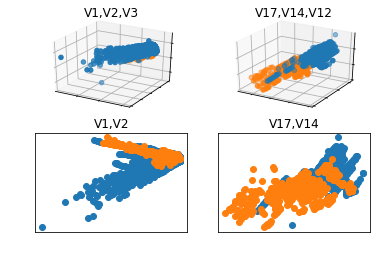

In [99]:
legit_v1    =legit.select("V1").toPandas()
legit_v2    =legit.select("V2").toPandas()
legit_v3    =legit.select("V3").toPandas()

legit_v17 =legit.select("V17").toPandas()
legit_v14 =legit.select("V14").toPandas()
legit_v12 =legit.select("V12").toPandas()

fraud_v1    =fraud.select("V1").toPandas()
fraud_v2    =fraud.select("V2").toPandas()
fraud_v3    =fraud.select("V3").toPandas()

fraud_v17 =fraud.select("V17").toPandas()
fraud_v14 =fraud.select("V14").toPandas()
fraud_v12 =fraud.select("V12").toPandas()

fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V1,V2,V3")
ax.scatter(legit_v1, legit_v2, legit_v3)
ax.scatter(fraud_v1, fraud_v2, fraud_v3)

ax = fig.add_subplot(2,2,3)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V1,V2")
ax.scatter(legit_v1, legit_v2)
ax.scatter(fraud_v1, fraud_v2)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V17,V14,V12")
ax.scatter(legit_v17, legit_v14, legit_v12)
ax.scatter(fraud_v17, fraud_v14, fraud_v12)

ax = fig.add_subplot(2,2,4)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V17,V14")
ax.scatter(legit_v17, legit_v14)
ax.scatter(fraud_v17, fraud_v14)

plt.show()

Anche visivamente è possibile notare che utilizzando le feature la cui distribuzione nelle due classi ha maggiore divergenza le due classi risultano meno "aderenti"

## Classification

Visto che le due classi sono fortemente sbilanciate, il classificatore verrebbe principalmente addestrato su campioni appartenenti alla classe delle transazioni legittime, introducendo un bias indesiderato: tutte le transazioni verrebbero classificate come legittime. 
Per questo motivo utilizziamo delle tecniche per mitigare il problema.

In [16]:
# Definiamo una funzione per stampare l'area sotto la curva precision-recall e 
# la matrice di confusione per il training set.
from pyspark.ml.tuning import CrossValidator

def evaluate_model(cvModel, train, test, callable=True):
  evaluator = cvModel.getEvaluator()
  predictions = cvModel.transform(test)
  performance = cvModel.transform(train)
  summary = cvModel.bestModel.stages[2].summary() \
            if callable else cvModel.bestModel.stages[2].summary

  auprc = evaluator.evaluate(performance)
  print(f"Area Under PR Curve (train): {(100*auprc):05.2f}%")

  plt.figure(figsize=(5,5))
  plt.plot([0, 1], [0, 1], 'r--')
  plt.plot(summary.roc.select('FPR').collect(),
          summary.roc.select('TPR').collect())
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title("Precision-Recall curve")
  plt.show()

  print("Test set results:")
  auprc = evaluator.evaluate(predictions)
  print(f"Area Under PR Curve:  {(100*auprc):05.2f}%")

  predictions.createOrReplaceTempView('predictions')
  tp = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 1 AND
                    predictions.prediction == 1.0 """).collect()[0].c
  print(f"True positives:       {tp}")
  fp = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 0 AND
                    predictions.prediction == 1.0 """).collect()[0].c
  print(f"False positives:      {fp}")
  tn = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 0 AND
                    predictions.prediction == 0.0 """).collect()[0].c
  print(f"True negatives:       {tn}")
  fn = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 1 AND
                    predictions.prediction == 0.0 """).collect()[0].c
  print(f"False negatives:      {fn}")

  sn.heatmap([[tp, fp],[fn,tn]], annot=True, fmt='.3g', cbar=False)\
   .set_title("Confusion matrix");

  precision = (tp)/(tp+fp)
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  recall = (tp)/(tp+fn)
  print(f"Precision:            {precision:1.3f}")
  print(f"Accuracy:             {accuracy:1.3f}")
  print(f"Recall:               {recall:1.3f}")
  print(f"F1:                   {(2*precision*recall)/(precision+recall):1.3f}")
  

In [17]:
# L'evaluator sarà lo stesso per tutti i modelli
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator().setLabelCol("Class")\
                                           .setMetricName("areaUnderPR")

In [18]:
# Necessary imports for all methods

from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.feature import IndexToString
from pyspark.ml.feature import StringIndexer

# The two classifiers
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import RandomForestClassifier 

### Undersampling

Nel training set sottocampioniamo gli elementi appartenenti alla classe dominante per non introdurre bias sulla frequenza relativa delle classi.

In [19]:
# Per ottenere train e test set tramite undersampling

def undersample_split(fraud, legit):
  train_f, test_f = fraud.randomSplit([0.8, 0.2])
  train_l, test_l = legit.randomSplit([0.8, 0.2])
  train_l = train_l.sample(False, 1.0*fraud.count()/legit.count()) \
      .limit (train_f.count())
  
  train       = train_f.union(train_l)
  test        = test_f.union(test_l)
  return (train, test)

train, test = undersample_split(fraud, legit)

##### Support vector machine 

Come primo approccio proviamo ad utilizzare come classificatore una support vector machine lineare, inoltre sottocampioniamo le transazioni legittime per non avere un dataset sbilanciato.

In [20]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(train.schema.names[0:-1])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
linearSVC = LinearSVC().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)

pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                linearSVC,\
                                labelConverter])

In [21]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(linearSVC.regParam, [0.1, 0.2, 0.5])\
                              .addGrid(linearSVC.maxIter, [20,50,100,200])\
                              .build()

In [22]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

In [23]:
cvModel_svm_us = cv.fit(train)

evaluate_model(cvModel_svm_us, train, test)
cvModel_svm_us.write().overwrite().save('svm_UF')

KeyboardInterrupt: ignored

L'85% delle frodi viene correttamente identificato, però 2/3 delle transazioni classificate come frodi sono in realtà transazioni legittime. Un tasso di falsi positivi così alto porta a perdere fiducia nello strumento diagnostico.

#### Random forest 

Confrontiamo il risultato precedente con una random forest, addestrata con gli stessi dati.

In [ ]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(train.schema.names[0:-1])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
randomForest = RandomForestClassifier().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)
pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                randomForest,\
                                labelConverter])


In [ ]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(randomForest.maxBins,[25, 28, 31])\
                              .addGrid(randomForest.maxDepth,[4,6,8])\
                              .addGrid(randomForest.impurity,["entropy","gini"])\
                              .build()

In [ ]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

cvModel_random_forest_us = cv.fit(train)

In [ ]:

evaluate_model(cvModel_random_forest_us, train, test, callable=False)
cvModel_random_forest_us.write().overwrite().save('random_forest_UF')

La random forest classifica correttamente molte più transazioni fraudolente, ma la precisione precipita sotto il 10%.

### Riduzione delle feature

I modelli precedenti, se addestrati con oversampling, non si comportano abbastanza bene, soprattutto la random forest. L'addestramento sta però avvenendo su un sottoinsieme molto piccolo dei dati sulle transazioni legittime, potremmo quindi non catturare delle caratteristiche importanti dei dati. Risulta allora opportuno provare un oversampling. 

L'addestramento con una porzione così grande del dataset con vettori di 30 feature però è una operazione molto pesante, ed è anche possibile che l'elevata dimensionalità riduca il potere di discriminazione dei modelli (curse of dimensionality). Effettuiamo quindi delle operazioni di selezione delle features.

#### Sfruttamento dei modelli addestrati precedentemente

Dai modelli appena addestrati è possibile ottenere informazioni riguardo l'importanza delle varie features.


##### **SVM**

Visto che le feature provengono da una PCA sono linearmente non correlate tra loro. I pesi appresi dalla SVM possono quindi fornire informazione su quali feature sono più rilevanti per la separazione delle due classi.

In [100]:
cvModel_svm_us.bestModel.stages[2].coefficients

NameError: ignored

Scaliamo il valore assoluto dei coefficienti per avere somma unitaria e li riportiamo nella tabella seguente 

Feature | Weight
-|-
  V21     |  0.1101
  V14     |  0.1014
  V11     |  0.0755
  V23     |  0.0732
  V4      |  0.0675
  V2      |  0.0605
  V10     |  0.0578
  V12     |  0.0402
  V22     |  0.0402
  Amount  |  0.0395
  V6      |  0.0375
  V8      |  0.0329
  V9      |  0.0319
  V28     |  0.0272
  V27     |  0.0258
  V7      |  0.0240
  V3      |  0.0238
  V16     |  0.0228
  V25     |  0.0223
  V17     |  0.0210
  V20     |  0.0198
  V1      |  0.0165
  V19     |  0.0064
  V5      |  0.0054
  V18     |  0.0039
  V15     |  0.0032
  V24     |  0.0030
  Time    |  0.0023
  V26     |  0.0017
  V13     |  0.0013


Le prime sette feature hanno più del 50% dell'importanza, e scartando le ultime 11 non si perde più del 10%.


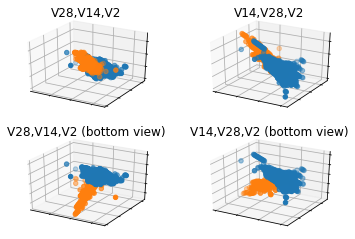

In [101]:
legit_x    =legit.select("V21").toPandas()
legit_y    =legit.select("V14").toPandas()
legit_z    =legit.select("V11").toPandas()

fraud_x    =fraud.select("V21").toPandas()
fraud_y    =fraud.select("V14").toPandas()
fraud_z    =fraud.select("V11").toPandas()

fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V28,V14,V11")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, fraud_z)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V14,V28,V11")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, fraud_z)

ax = fig.add_subplot(2,2,3,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V28,V14,V11 (bottom view)")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, -fraud_z)

ax = fig.add_subplot(2,2,4,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V14,V28,V11 (bottom view)")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, -fraud_z)

plt.show()

Osserviamo che considerando le sole tre features con i pesi maggiori è già possibile distinguere abbastanza nitidamente le due classi, meglio di quanto visto usando come features V1, V2, V3, e il che effettivamente risultano essere abbastanza in basso nella lista ed eccezione di V2.

##### **Random Forest**

La random forest non dava risultati molto incoraggianti, però visto che gli split sono effettuati in base all'entropia può essere interessante osservare quali feature sono state ritenute più importanti.

In [ ]:
cvModel_random_forest_us.bestModel.stages[2].featureImportances

Per comodità di visione si riportano i dati in output al comando precedente anche in formato tabellare.

Feature | Importance
-|-
  V10 |  0.3711, 
  V12 |  0.1409, 
  V17 |  0.0927, 
  V14 |  0.0807, 
  V11 |  0.0728, 
  V7 |  0.0351, 
  V4 |  0.0226, 
  V9 |  0.0206, 
  Amount |  0.0206 
  V8 |  0.0199, 
  V18 |  0.0167, 
  V1 |  0.0154, 
  V3 |  0.0095, 
  V20 |  0.0095, 
  V16 |  0.0087, 
  V26 |  0.006, 
  V23 |  0.0069, 
  V6 |  0.005, 
  V19 |  0.0058, 
  V13 |  0.0057, 
  V15 |  0.0053, 
  V27 |  0.004, 
  V2 |  0.004, 
  Time |  0.0045, 
  V28 |  0.0039, 
  V21 |  0.0038, 
  V24 |  0.0029, 
  V5 |  0.0024, 
  V25 |  0.0016, 
  V22 |  0.0015, 



Le prime due features da sole hanno il 50% dell'importanza, e per arrivare al 90% bastano le prime 12

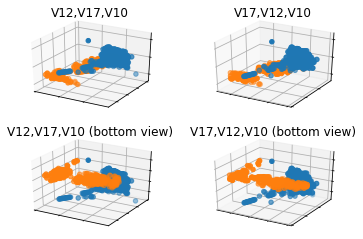

In [102]:
legit_x    =legit.select("V12").toPandas()
legit_y    =legit.select("V17").toPandas()
legit_z    =legit.select("V10").toPandas()

fraud_x    =fraud.select("V12").toPandas()
fraud_y    =fraud.select("V17").toPandas()
fraud_z    =fraud.select("V10").toPandas()

fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V12,V17,V10")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, fraud_z)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V17,V12,V10")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, fraud_z)

ax = fig.add_subplot(2,2,3,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V12,V17,V10 (bottom view)")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, -fraud_z)

ax = fig.add_subplot(2,2,4,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V17,V12,V10 (bottom view)")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, -fraud_z)

plt.show()

Ad una ispezione visiva le classi sembrano separate meglio di quanto non succedesse con la SVM, viene quindi da pensare che le prestazioni migliori siano dovute alla scarsità di campioni di transazioni legittime osservati, che ha portato ad attribuire alla classe di transazioni fraudolete aree più ampie del dovuto.



$D_{KL}$ |  RF     |   SVM     |
---------|---------|------------
 V17     |  V10    |   V21     |
 V14     |  V12    |   V14     |
 V12     |  V17    |   V11     |
 V10     |  V14    |   V23     |
 V16     |  V11    |   V4      |
 V3      |  V7     |   V2      |  
 V7      |  V4     |   V10     |  
 V11     |  V9     |   V12     |
 V4      |  Amount |   V22     |  
 V18     |  V8     |   Amount  |
 V1      |  V18    |   V6      |  
 V9      |  V1     |   V8      |  
 V5      |  V3     |   V9      |  
 V2      |  V20    |   V28     |  
 V6      |  V16    |   V27     |  
 V19     |  V26    |   V7      |
 V8      |  V23    |   V3      |  
 V21     |  V6     |   V16     |
 V27     |  V19    |   V25     |
 V20     |  V13    |   V17     |
 Time    |  V15    |   V20     |
 V28     |  V27    |   V1      |
 V24     |  V2     |   V19     |
 V23     |  Time   |   V5      |
 Amount  |  V28    |   V18     |
 V22     |  V21    |   V15     |
 V26     |  V24    |   V24     |
 V13     |  V5     |   Time    |
 V15     |  V25    |   V26     |
 V25     |  V22    |   V13     |

Scegliamo come feature da utilizzare per l'addestramento con versampling `[V14, V17, V10, V12, V11]`, ovvero le prime quattro feature in ordine di divergenza di Kullback-Leibler e `V11`. `V11` è all'ottavo posto nella colonna $D_{KL}$, ma è tra le prime cinque nelle altre due colonne, mentre `V16` è molto più giù.

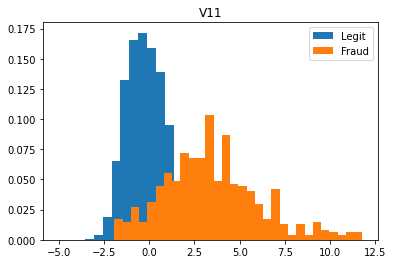

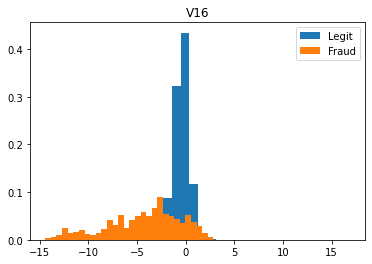

In [67]:
for col in ["V11","V16"]:
  hist_f = fraud.select(col).rdd.flatMap(lambda x: x).histogram(30)
  hist_l = legit.select(col).rdd.flatMap(lambda x: x).histogram(30)
  # Loading the Computed Histogram into a Pandas Dataframe for plotting
  fig = plt.figure()
  plt.title(col)
  plt.axis(True)
  plt.bar(hist_l[0][0:-1],hist_l[1]/np.sum(hist_l[1]), width=np.diff(hist_l[0]))
  plt.bar(hist_f[0][0:-1],hist_f[1]/np.sum(hist_f[1]), width=np.diff(hist_f[0]))
  plt.legend(["Legit","Fraud"])
  
  plt.show()

In [69]:
chosen_cols = ["V14", "V17", "V10", "V12", "V11"]

### Oversampling

Facendo undersampling non prendiamo in considerazione la maggior parte delle informazioni disponibili sulla classe dominante, portando a bassa capacità della rete di generalizzare, ricorriamo quindi ad oversampling.
Nel training set presentiamo più volte gli elementi appartenenti alla classe meno frequente per non introdurre bias sulla frequenza relativa delle classi.

Il test set viene estratto prima della duplicazione dei campioni per evitare di testare il classificatore sugli stessi dati su cui è stato testato.

In [24]:
# Per ottenere train e test set tramite undersampling
import math
def oversample_split(fraud, legit):
  train_f, test_f = fraud.randomSplit([0.8, 0.2])
  train_l, test_l = legit.randomSplit([0.8, 0.2])

  a = range(math.ceil(train_l.count()/train_f.count()))
    # duplicate the minority rows
  oversampled_train_f = train_f.withColumn("dummy", explode(array([lit(x) for x in a])))\
    .drop('dummy')
  # The train test is balanced with 50/50 frauds and legit transactions
  # to avoid bias towards legit transactions
  train       = oversampled_train_f.union(train_l)
  # The test set has the same distribution of the original dataset
  test        = test_f.union(test_l)
  return (train, test)
  
train, test = oversample_split(fraud, legit)

#### Support vector machine 

Come primo approccio proviamo ad utilizzare come classificatore una support vector machine lineare, inoltre sottocampioniamo le transazioni legittime per non avere un dataset sbilanciato.

In [25]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(chosen_cols)\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
linearSVC = LinearSVC().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)

pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                linearSVC,\
                                labelConverter])

In [26]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(linearSVC.regParam, [0.1, 0.2, 0.5])\
                              .addGrid(linearSVC.maxIter, [20,50,100,200])\
                              .build()

In [27]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

In [28]:
cvModel_svm_os = cv.fit(train)

evaluate_model(cvModel_svm_os, train, test)

KeyboardInterrupt: ignored

In [ ]:
cvModel_svm_os.write().overwrite().save('svm_OF')

Il classificatore basato su SVM non mostra apprezzabili miglioramenti modificando la strategia di campionamento per il test set.

#### Random forest 

Confrontiamo il risultato precedente con una random forest, addestrata con gli stessi dati.

In [ ]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(chosen_cols)\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
randomForest = RandomForestClassifier().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)
pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                randomForest,\
                                labelConverter])


In [ ]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(randomForest.maxBins,[25, 28, 31])\
                              .addGrid(randomForest.maxDepth,[4,6,8])\
                              .addGrid(randomForest.impurity,["entropy","gini"])\
                              .build()

In [ ]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

cvModel_random_forest_os = cv.fit(train)

In [ ]:

evaluate_model(cvModel_random_forest_os, train, test, callable=False)
cvModel_random_forest_os.write().overwrite().save('random_forest_OF')

La random forest ha migliorato sensibilmente la precisione e l'area sotto la curva, aumentando però il numero di falsi negativi.